# Сборный Проект — 2. HR-аналитика

## Описание проекта

Перейдём к задаче. HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.
Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. 
Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли. \
У вас будет несколько задач. Первая — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. \
Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.
Ваша вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

### Задача 1
#### Входные данные
`id` — уникальный идентификатор сотрудника;\
`dept` — отдел, в котором работает сотрудник;\
`level` — уровень занимаемой должности;\
`workload` — уровень загруженности сотрудника;\
`employment_years` — длительность работы в компании (в годах);\
`last_year_promo` — показывает, было ли повышение за последний год;\
`last_year_violations` — показывает, нарушал ли сотрудник трудовой договор за последний год;\
`supervisor_evaluation` — оценка качества работы сотрудника, которую дал руководитель;\
`salary` — ежемесячная зарплата сотрудника;\
`job_satisfaction_rate` — уровень удовлетворённости сотрудника работой в компании, целевой признак.\
Тренировочная выборка:\
`train_job_satisfaction_rate.csv`\
Входные признаки тестовой выборки:\
`test_features.csv`\
Целевой признак тестовой выборки:\
`test_target_job_satisfaction_rate.csv`
#### План работы
1) Загрузка данных\
2) Предобработка данных\
3) Исследовательский анализ данных\
4) Подготовка данных\
5) Обучение моделей\
6) Оформление выводов

### Задача 2
#### Входные данные
Входные признаки те же, что и в предыдущей задаче. Однако целевой признак отличается: это `quit` — увольнение сотрудника из компании.\
Тренировочная выборка:\
`train_quit.csv`
Входные признаки тестовой выборки те же, что и в прошлой задаче:\
`test_features.csv`
Целевой признак тестовой выборки:\
`test_target_quit.csv`
#### План работы
1) Загрузка данных\
2) Предобработка данных\
3) Исследовательский анализ данных\
4) Добавление нового входного признака\
5) Подготовка данных\
6) Обучение моделей\
7) Оформление выводов\
8) Написание общего вывода

## Задача 1

### Загрузка данных

In [1]:
!pip install phik
!pip install scikit-learn -U

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import phik
import numpy as np

from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer 
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [3]:
train = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
X_test = pd.read_csv('/datasets/test_features.csv')
y_test = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

In [4]:
train.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [5]:
X_test.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [6]:
y_test.head()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


В данном шаге были импортированы библиотеки, загружены данные и был проведён их первичный осмотр

### Предобработка данных

In [7]:
train.set_index('id', inplace=True)
X_test.set_index('id', inplace=True)
y_test.set_index('id', inplace=True)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 155278 to 338347
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   3994 non-null   object 
 1   level                  3996 non-null   object 
 2   workload               4000 non-null   object 
 3   employment_years       4000 non-null   int64  
 4   last_year_promo        4000 non-null   object 
 5   last_year_violations   4000 non-null   object 
 6   supervisor_evaluation  4000 non-null   int64  
 7   salary                 4000 non-null   int64  
 8   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 312.5+ KB


In [9]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   1998 non-null   object
 1   level                  1999 non-null   object
 2   workload               2000 non-null   object
 3   employment_years       2000 non-null   int64 
 4   last_year_promo        2000 non-null   object
 5   last_year_violations   2000 non-null   object
 6   supervisor_evaluation  2000 non-null   int64 
 7   salary                 2000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 140.6+ KB


In [10]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 130604 to 648995
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1)
memory usage: 31.2 KB


In [11]:
report = train.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / train.shape[0]).round(2)*100
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
dept,6,0.0
level,4,0.0
workload,0,0.0
employment_years,0,0.0
last_year_promo,0,0.0
last_year_violations,0,0.0
supervisor_evaluation,0,0.0
salary,0,0.0
job_satisfaction_rate,0,0.0


In [12]:
report = X_test.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / X_test.shape[0]).round(2)*100
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
dept,2,0.0
level,1,0.0
workload,0,0.0
employment_years,0,0.0
last_year_promo,0,0.0
last_year_violations,0,0.0
supervisor_evaluation,0,0.0
salary,0,0.0


In [13]:
report = y_test.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / y_test.shape[0]).round(2)*100
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
job_satisfaction_rate,0,0.0


In [14]:
train.duplicated().sum()

245

In [15]:
train = train.drop_duplicates()
train.shape

(3755, 9)

In [16]:
train['dept'].unique()

array(['sales', 'hr', 'technology', 'purchasing', 'marketing', nan],
      dtype=object)

In [17]:
X_test['dept'].unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
      dtype=object)

In [18]:
train['level'].unique()

array(['junior', 'middle', 'sinior', nan], dtype=object)

In [19]:
X_test['level'].unique()

array(['junior', 'middle', 'sinior', nan], dtype=object)

In [20]:
train['workload'].unique()

array(['medium', 'high', 'low'], dtype=object)

In [21]:
X_test['workload'].unique()

array(['medium', 'low', 'high', ' '], dtype=object)

In [22]:
train['last_year_promo'].unique()

array(['no', 'yes'], dtype=object)

In [23]:
X_test['last_year_promo'].unique()

array(['no', 'yes'], dtype=object)

In [24]:
train['last_year_violations'].unique()

array(['no', 'yes'], dtype=object)

In [25]:
X_test['last_year_violations'].unique()

array(['no', 'yes'], dtype=object)

In [26]:
X_test.loc[X_test['dept'] == ' ', 'dept'] = np.nan
X_test.loc[X_test['workload'] == ' ', 'workload'] = np.nan
train.loc[train['level'] == 'sinior', 'level'] = 'senior'
X_test.loc[X_test['level'] == 'sinior', 'level'] = 'senior'

In [27]:
X_test['level'].unique()

array(['junior', 'middle', 'senior', nan], dtype=object)

В данном шаге были первично изучены датафреймы, проверены на пропуски, явные/неявные дубликаты. Были обнаружены некоторые пропуски, позже, при обучении модели, заполним их в пайплайне. Дубликаты были обнаружены в тренировочной выборке и удалены. Дубликаты в тестовых выборках удалять не будем, так как на качество обучения модели они не повлияют. Неявные дубликаты были обнаружены в тестовом датасете, там пропуски были заданы по разному. Все они были приведины к `np.nan`, их обработкой займёмся позже.

### Исследовательский анализ данных

In [28]:
train.describe()

,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,3755.000000,3755.000000,3755.000000,3755.000000
mean,3.817044,3.463648,34457.416778,0.532554
std,2.557142,1.026265,15050.643870,0.226393
min,1.000000,1.000000,12000.000000,0.030000
25%,2.000000,3.000000,22800.000000,0.350000
50%,3.000000,4.000000,31200.000000,0.550000
75%,6.000000,4.000000,44400.000000,0.710000
max,10.000000,5.000000,98400.000000,1.000000


In [29]:
X_test.describe()

,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000
mean,3.666500,3.526500,34066.800000
std,2.537222,0.996892,15398.436729
min,1.000000,1.000000,12000.000000
25%,1.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


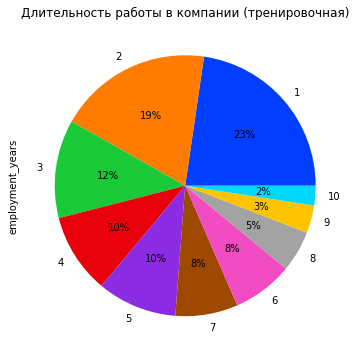

In [30]:
palette_color = sn.color_palette('bright') 
train['employment_years'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Длительность работы в компании (тренировочная)', colors = palette_color, figsize = (14, 6))
plt.show()

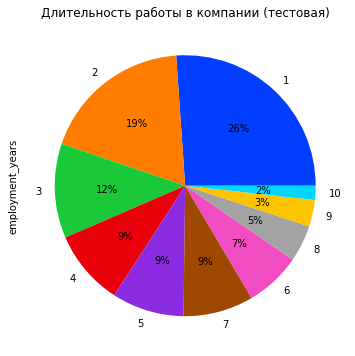

In [31]:
palette_color = sn.color_palette('bright') 
X_test['employment_years'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Длительность работы в компании (тестовая)', colors = palette_color, figsize = (14, 6))
plt.show()

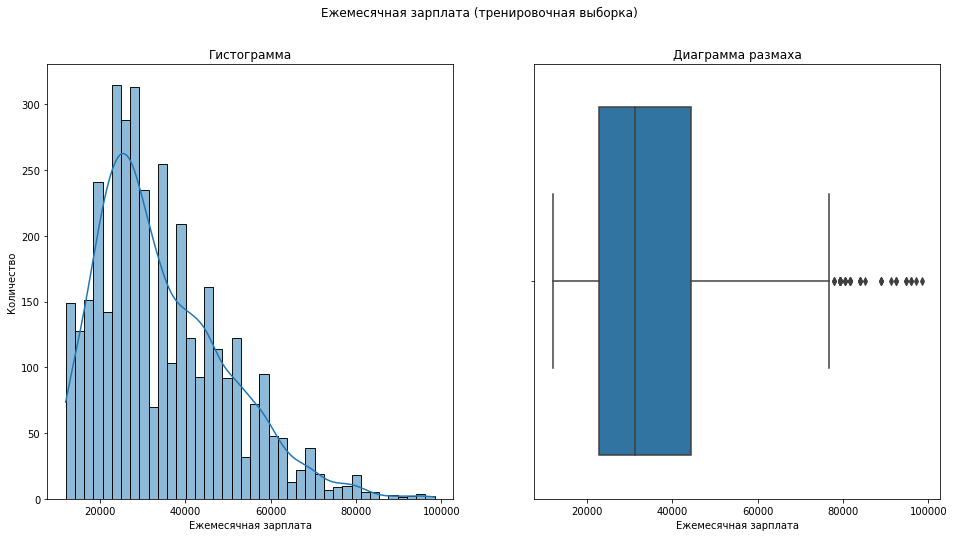

In [32]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sn.histplot(data = train,x = 'salary', ax=axs[0], bins = 40, kde=True)
axs[0].set_xlabel('Ежемесячная зарплата')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')
sn.boxplot(data = train,x = 'salary', ax=axs[1])
axs[1].set_xlabel('Ежемесячная зарплата')
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Ежемесячная зарплата (тренировочная выборка)')
plt.show()

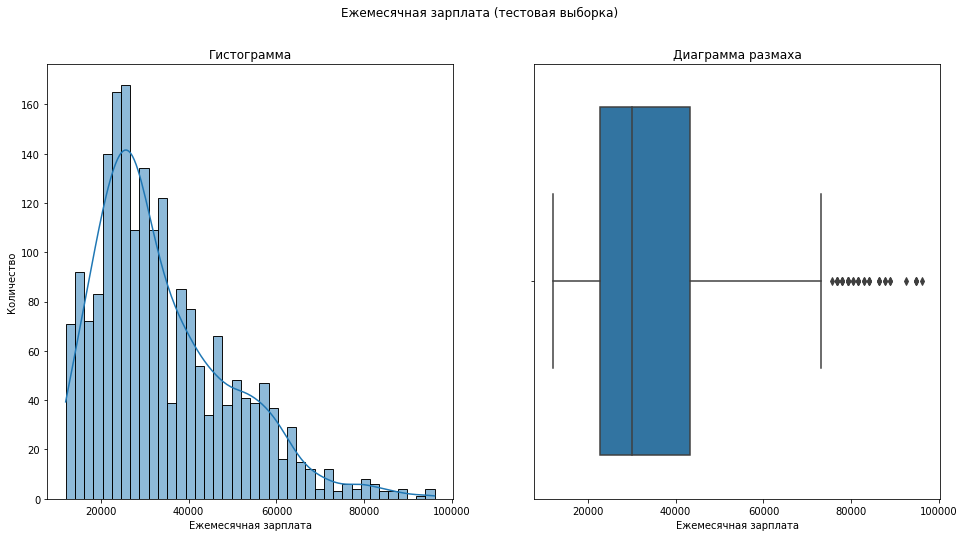

In [33]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sn.histplot(data = X_test,x = 'salary', ax=axs[0], bins = 40, kde=True)
axs[0].set_xlabel('Ежемесячная зарплата')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')
sn.boxplot(data = X_test,x = 'salary', ax=axs[1])
axs[1].set_xlabel('Ежемесячная зарплата')
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Ежемесячная зарплата (тестовая выборка)')
plt.show()

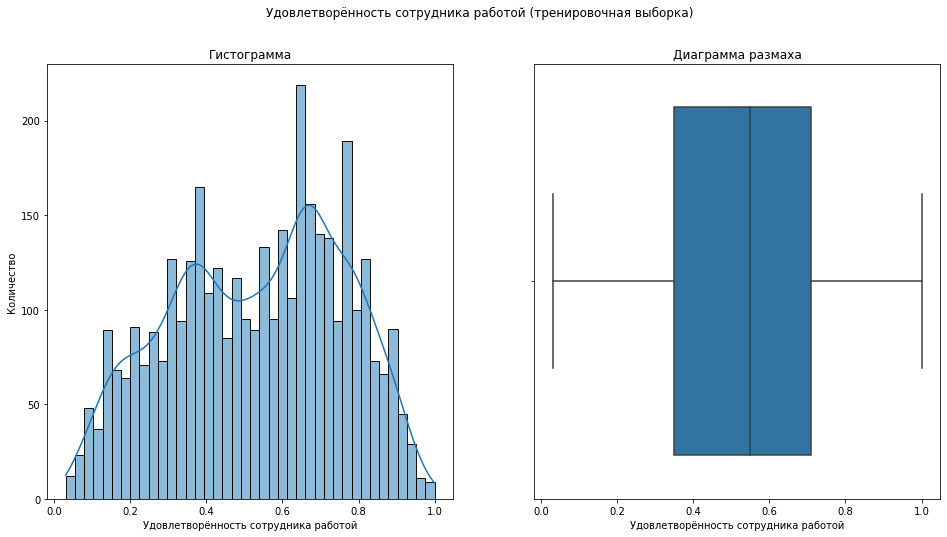

In [34]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sn.histplot(data = train,x = 'job_satisfaction_rate', ax=axs[0], bins = 40, kde=True)
axs[0].set_xlabel('Удовлетворённость сотрудника работой')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')
sn.boxplot(data = train,x = 'job_satisfaction_rate', ax=axs[1])
axs[1].set_xlabel('Удовлетворённость сотрудника работой')
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Удовлетворённость сотрудника работой (тренировочная выборка)')
plt.show()

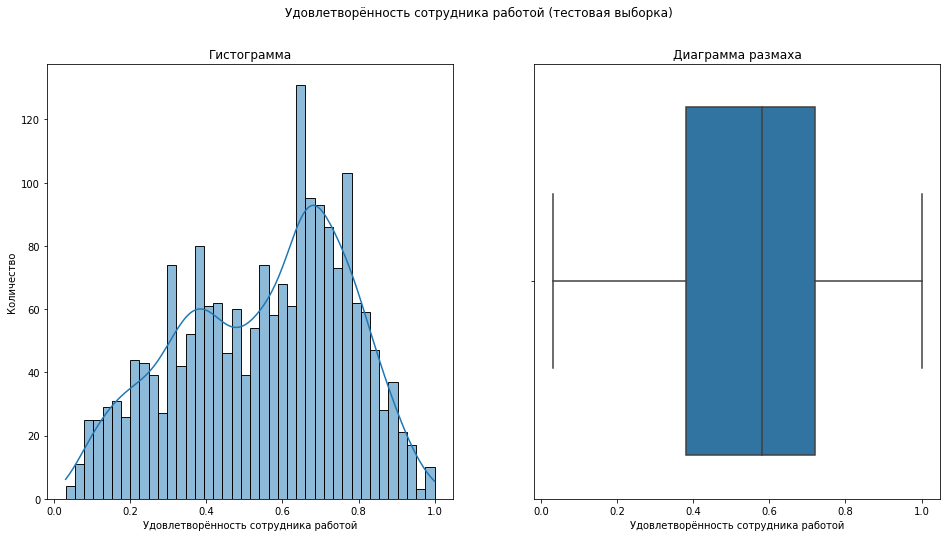

In [35]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sn.histplot(data = y_test,x = 'job_satisfaction_rate', ax=axs[0], bins = 40, kde=True)
axs[0].set_xlabel('Удовлетворённость сотрудника работой')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')
sn.boxplot(data = y_test,x = 'job_satisfaction_rate', ax=axs[1])
axs[1].set_xlabel('Удовлетворённость сотрудника работой')
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Удовлетворённость сотрудника работой (тестовая выборка)')
plt.show()

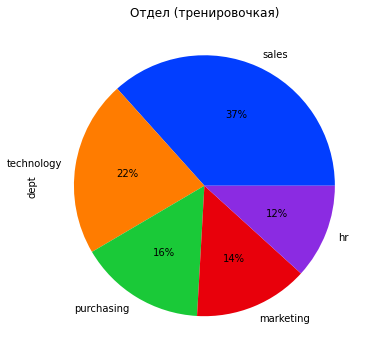

In [36]:
palette_color = sn.color_palette('bright') 
train['dept'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Отдел (тренировочкая)', colors = palette_color, figsize = (14, 6))
plt.show()

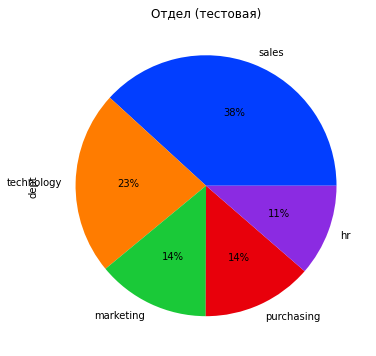

In [37]:
palette_color = sn.color_palette('bright') 
X_test['dept'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Отдел (тестовая)', colors = palette_color, figsize = (14, 6))
plt.show()

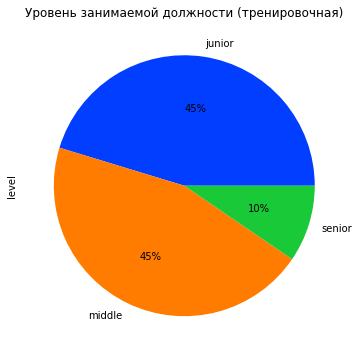

In [38]:
palette_color = sn.color_palette('bright') 
train['level'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Уровень занимаемой должности (тренировочная)', colors = palette_color, figsize = (14, 6))
plt.show()

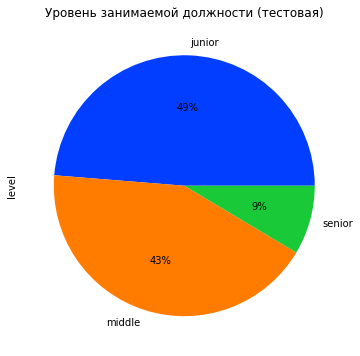

In [39]:
palette_color = sn.color_palette('bright') 
X_test['level'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Уровень занимаемой должности (тестовая)', colors = palette_color, figsize = (14, 6))
plt.show()

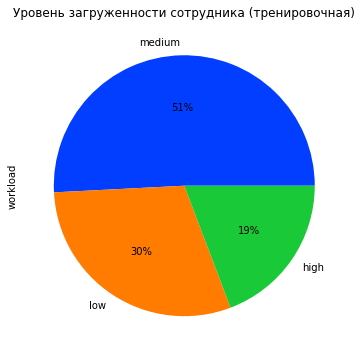

In [40]:
palette_color = sn.color_palette('bright') 
train['workload'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Уровень загруженности сотрудника (тренировочная)', colors = palette_color, figsize = (14, 6))
plt.show()

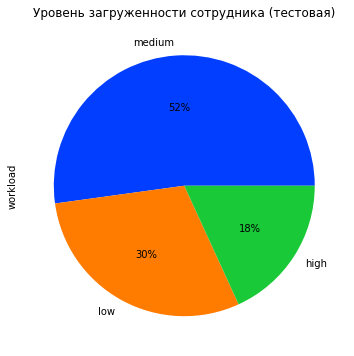

In [41]:
palette_color = sn.color_palette('bright') 
X_test['workload'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Уровень загруженности сотрудника (тестовая)', colors = palette_color, figsize = (14, 6))
plt.show()

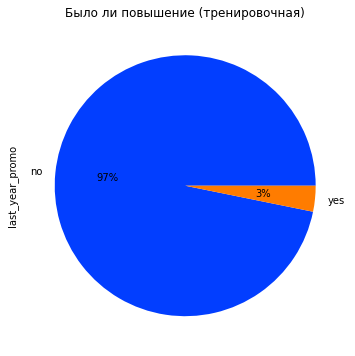

In [42]:
palette_color = sn.color_palette('bright') 
train['last_year_promo'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Было ли повышение (тренировочная)', colors = palette_color, figsize = (14, 6))
plt.show()

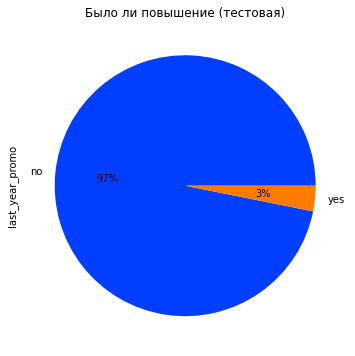

In [43]:
palette_color = sn.color_palette('bright') 
X_test['last_year_promo'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Было ли повышение (тестовая)', colors = palette_color, figsize = (14, 6))
plt.show()

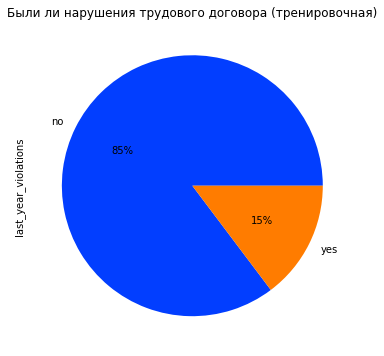

In [44]:
palette_color = sn.color_palette('bright') 
train['last_year_violations'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Были ли нарушения трудового договора (тренировочная)', colors = palette_color, figsize = (14, 6))
plt.show()

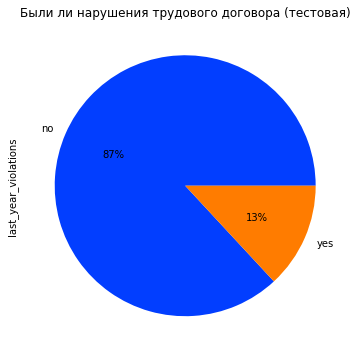

In [45]:
palette_color = sn.color_palette('bright') 
X_test['last_year_violations'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Были ли нарушения трудового договора (тестовая)', colors = palette_color, figsize = (14, 6))
plt.show()

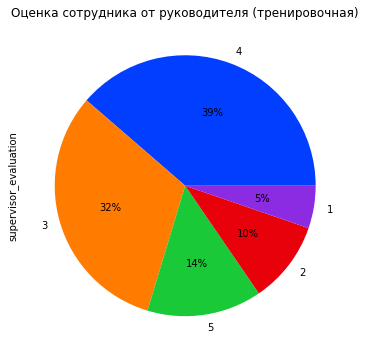

In [46]:
palette_color = sn.color_palette('bright') 
train['supervisor_evaluation'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Оценка сотрудника от руководителя (тренировочная)', colors = palette_color, figsize = (14, 6))
plt.show()

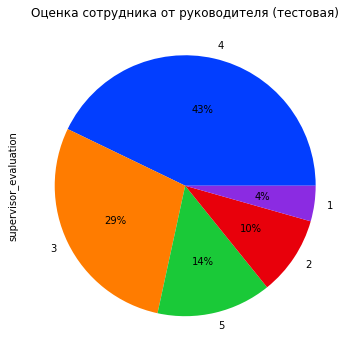

In [47]:
palette_color = sn.color_palette('bright') 
X_test['supervisor_evaluation'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Оценка сотрудника от руководителя (тестовая)', colors = palette_color, figsize = (14, 6))
plt.show()

In [48]:
train.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
155278,sales,junior,medium,2,no,no,1,24000,0.58
653870,hr,junior,high,2,no,no,5,38400,0.76
184592,sales,junior,low,1,no,no,2,12000,0.11
171431,technology,junior,low,4,no,no,2,18000,0.37
693419,hr,junior,medium,1,no,no,3,22800,0.20


In [49]:
train.phik_matrix(interval_cols = ['salary', 'job_satisfaction_rate']).style.background_gradient(cmap ='coolwarm')

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
dept,1.000000,0.000000,0.018079,0.025931,0.000000,0.000000,0.100579,0.270239,0.074739
level,0.000000,1.000000,0.404459,0.675467,0.100352,0.000000,0.000000,0.714411,0.077260
workload,0.018079,0.404459,1.000000,0.165879,0.057938,0.000000,0.037565,0.785277,0.043958
employment_years,0.025931,0.675467,0.165879,1.000000,0.180832,0.043766,0.000000,0.469992,0.319331
last_year_promo,0.000000,0.100352,0.057938,0.180832,1.000000,0.011274,0.016247,0.211173,0.191464
last_year_violations,0.000000,0.000000,0.000000,0.043766,0.011274,1.000000,0.183221,0.000000,0.566993
supervisor_evaluation,0.100579,0.000000,0.037565,0.000000,0.016247,0.183221,1.000000,0.000000,0.762964
salary,0.270239,0.714411,0.785277,0.469992,0.211173,0.000000,0.000000,1.000000,0.149599
job_satisfaction_rate,0.074739,0.077260,0.043958,0.319331,0.191464,0.566993,0.762964,0.149599,1.000000


In [50]:
X_test.phik_matrix(interval_cols = ['salary'] ).style.background_gradient(cmap ='coolwarm')

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
dept,1.000000,0.000000,0.033894,0.000000,0.000000,0.000000,0.060917,0.330406
level,0.000000,1.000000,0.474151,0.689666,0.118258,0.017527,0.000000,0.748998
workload,0.033894,0.474151,1.000000,0.202240,0.035609,0.000000,0.036353,0.785849
employment_years,0.000000,0.689666,0.202240,1.000000,0.173637,0.066371,0.000000,0.494701
last_year_promo,0.000000,0.118258,0.035609,0.173637,1.000000,0.000000,0.011704,0.193727
last_year_violations,0.000000,0.017527,0.000000,0.066371,0.000000,1.000000,0.189719,0.000000
supervisor_evaluation,0.060917,0.000000,0.036353,0.000000,0.011704,0.189719,1.000000,0.114588
salary,0.330406,0.748998,0.785849,0.494701,0.193727,0.000000,0.114588,1.000000


По результатам данного шага можно сказать, что выбросов и аномалий в данных не обнаружено. Между некоторыми признаками есть связь, но она нигде не превышает 0.9, так что менять ничего не будем. Так же было проведено сравнение тестовой и тренировочной выборки - сильных отличий нет\
\
Для подготовки признаков будем использовать:
- MinMaxScaler/StandartScaler для стобцов `employment_years`, `salary`
- OrdinalEncoder для столбцов `supervisor_evaluation`, `level`, `workload`
- OneHotEncoder для столбцов `dept`, `last_year_promo`, `last_year_violations`

### Подготовка данных

In [51]:
ohe_columns = ['dept', 'last_year_promo',  'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['supervisor_evaluation', 'employment_years', 'salary']
RANDOM_STATE = 50

y = train['job_satisfaction_rate']
X = train.drop(['job_satisfaction_rate'], axis = 1)

In [52]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output =False)
        )
    ]
) 

In [53]:
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',  
            OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'senior'],
                    ['low', 'medium', 'high']
                ], 
                handle_unknown='error'
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
) 

In [54]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
) 

Были написаны пайплайны для подготовки признаков. В следующем пункте напишем итоговый пайплайн для подбора лучшей модели, гиперпараметров к ним

### Обучение модели

In [55]:
pipe_final= Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])

In [56]:
param_distributions = [
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': [None] + [i for i in range(2, 7)],
        'models__min_samples_split': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    {
        'models': [Ridge(random_state = RANDOM_STATE)],
        'models__solver': ['saga', 'auto'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    }
] 

In [57]:
def smape_score(y_true, y_pred):
    return 100/len(y_true) * np.sum(np.abs(y_true-y_pred)/((np.abs(y_true) + np.abs(y_pred))/2))

smape_scorer = make_scorer(smape_score, greater_is_better = False)

In [58]:
grid_search = GridSearchCV(
    pipe_final, 
    param_distributions, 
    cv = 5,
    scoring=smape_scorer, 
    n_jobs=-1
)
grid_search.fit(X, y)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['dept',
                                                                          'last_year_promo',
                                                                          'last_year_violations']),
                                                                        ('ord',
                                                                         Pipeline(...
                         {'models': [LinearRegression()],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(), RobustScaler(),
                                                'passthrough']},
                         {'models': [Ridge(random_state=50)],
                          'models__solver': ['saga', 'auto'],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(), RobustScaler(),
                                                'passthrough']}],
             scoring=make_scorer(smape_score, greater_is_better=False, response_method='predict'))

In [59]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_befor...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(categories=[['junior',
                                                                                               'middle',
                                                                                               'senior'],
                                                                                              ['low',
                                                                                               'medium',
                                                                                               'high']])),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['level', 'workload']),
                                                 ('num', MinMaxScaler(),
                                                  ['supervisor_evaluation',
                                                   'employment_years',
                                                   'salary'])])),
                ('models',
                 DecisionTreeRegressor(min_samples_split=8, random_state=50))])

In [60]:
print(f'Метрика лучшей модели на кросс-валидации: {-grid_search.best_score_}')

Метрика лучшей модели на кросс-валидации: 14.964210147314947


Лучшей моделью получилось `DecisionTreeRegressor(min_samples_split=8, random_state=50)`. Теперь, проверим её качество на тестовой выборке.

In [61]:
y_test = y_test.sort_index()
X_test = X_test.sort_index()

In [62]:
y_predict = grid_search.predict(X_test)

In [63]:
smape_score(np.array(y_test['job_satisfaction_rate']), y_predict)

13.56284455219568

Значение метрики меньше 15, а значит модель работает успешно

### Промежуточные выводы

В данном шаге была найдена и обучена лучшая модель по предсказанию уровня удовлетворённости сотрудника работой. Значение метрики на тестовой выборке составляет 13.56, что является успехом, ведь для неё необходимо значение меньше 15. Лучшей моделью стала `DecisionTreeRegressor(min_samples_split=8, random_state=50)`. Данная модель справилась лучше линейной регрессии, так как лучше справляется при нелинейной зависимости признаков, а, учитывая матрицу корреляции, можно сказать, что у нас признаков с такой зависимостью много.

## Задача 2

### Загрузка данных

In [64]:
train_2 = pd.read_csv('/datasets/train_quit.csv')
X_test_2 = pd.read_csv('/datasets/test_features.csv')
y_test_2 = pd.read_csv('/datasets/test_target_quit.csv')

In [65]:
train_2.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [66]:
X_test_2.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [67]:
y_test_2.head()

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


### Предобработка данных

In [68]:
train_2.set_index('id', inplace=True)
X_test_2.set_index('id', inplace=True)
y_test_2.set_index('id', inplace=True)

In [69]:
train_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 723290 to 853842
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   4000 non-null   object
 1   level                  4000 non-null   object
 2   workload               4000 non-null   object
 3   employment_years       4000 non-null   int64 
 4   last_year_promo        4000 non-null   object
 5   last_year_violations   4000 non-null   object
 6   supervisor_evaluation  4000 non-null   int64 
 7   salary                 4000 non-null   int64 
 8   quit                   4000 non-null   object
dtypes: int64(3), object(6)
memory usage: 312.5+ KB


In [70]:
X_test_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   1998 non-null   object
 1   level                  1999 non-null   object
 2   workload               2000 non-null   object
 3   employment_years       2000 non-null   int64 
 4   last_year_promo        2000 non-null   object
 5   last_year_violations   2000 non-null   object
 6   supervisor_evaluation  2000 non-null   int64 
 7   salary                 2000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 140.6+ KB


In [71]:
y_test_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 999029 to 460332
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   quit    2000 non-null   object
dtypes: object(1)
memory usage: 31.2+ KB


In [72]:
train_2.duplicated().sum()

1413

In [73]:
train_2 = train_2.drop_duplicates()

In [74]:
train_2['dept'].unique()

array(['sales', 'purchasing', 'marketing', 'technology', 'hr'],
      dtype=object)

In [75]:
X_test_2['dept'].unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
      dtype=object)

In [76]:
train_2['level'].unique()

array(['middle', 'junior', 'sinior'], dtype=object)

In [77]:
X_test_2['level'].unique()

array(['junior', 'middle', 'sinior', nan], dtype=object)

In [78]:
train_2['workload'].unique()

array(['high', 'medium', 'low'], dtype=object)

In [79]:
X_test_2['workload'].unique()

array(['medium', 'low', 'high', ' '], dtype=object)

In [80]:
train_2['last_year_promo'].unique()

array(['no', 'yes'], dtype=object)

In [81]:
X_test_2['last_year_promo'].unique()

array(['no', 'yes'], dtype=object)

In [82]:
train_2['last_year_violations'].unique()

array(['no', 'yes'], dtype=object)

In [83]:
X_test_2['last_year_violations'].unique()

array(['no', 'yes'], dtype=object)

In [84]:
train_2['quit'].unique()

array(['no', 'yes'], dtype=object)

In [85]:
y_test_2['quit'].unique()

array(['yes', 'no'], dtype=object)

In [86]:
X_test_2['workload'].unique()

array(['medium', 'low', 'high', ' '], dtype=object)

In [87]:
X_test_2.loc[X_test_2['dept'] == ' ', 'dept'] = np.nan
X_test_2.loc[X_test_2['workload'] == ' ', 'workload'] = np.nan
train_2.loc[train_2['level'] == 'sinior', 'level'] = 'senior'
X_test_2.loc[X_test_2['level'] == 'sinior', 'level'] = 'senior'

In [88]:
report = X_test_2.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / X_test_2.shape[0]).round(2)*100
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
dept,3,0.0
level,1,0.0
workload,1,0.0
employment_years,0,0.0
last_year_promo,0,0.0
last_year_violations,0,0.0
supervisor_evaluation,0,0.0
salary,0,0.0


In [89]:
report = train_2.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / train_2.shape[0]).round(2)*100
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
dept,0,0.0
level,0,0.0
workload,0,0.0
employment_years,0,0.0
last_year_promo,0,0.0
last_year_violations,0,0.0
supervisor_evaluation,0,0.0
salary,0,0.0
quit,0,0.0


In [90]:
report = y_test_2.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / y_test_2.shape[0]).round(2)*100
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
quit,0,0.0


В данном шаге были первично изучены датафреймы, проверены на пропуски, явные/неявные дубликаты. Были обнаружены некоторые пропуски, позже, при обучении модели, заполним их в пайплайне. Дубликаты были обнаружены в тренировочной выборке и удалены. Дубликаты в тестовых выборках удалять не будем, так как на качество обучения модели они не повлияют. Неявные дубликаты были обнаружены в тестовом датасете, там пропуски были заданы по разному. Все они были приведины к np.nan, их обработкой займёмся позже.

### Исследовательский анализ данных

#### Исследовательский анализ данных

In [91]:
train_2.describe()

,employment_years,supervisor_evaluation,salary
count,2587.000000,2587.000000,2587.000000
mean,4.213375,3.367994,37107.692308
std,2.601105,1.080243,16267.354906
min,1.000000,1.000000,12000.000000
25%,2.000000,3.000000,24000.000000
50%,4.000000,3.000000,33600.000000
75%,6.000000,4.000000,46800.000000
max,10.000000,5.000000,96000.000000


In [92]:
X_test_2.describe()

,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000
mean,3.666500,3.526500,34066.800000
std,2.537222,0.996892,15398.436729
min,1.000000,1.000000,12000.000000
25%,1.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


In [93]:
y_test_2.describe()

,quit
count,2000
unique,2
top,no
freq,1436


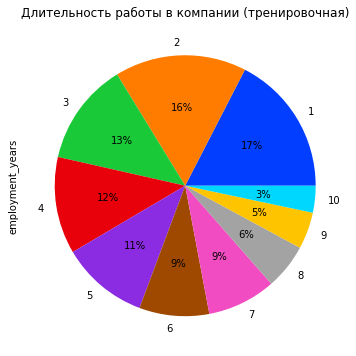

In [94]:
palette_color = sn.color_palette('bright') 
train_2['employment_years'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Длительность работы в компании (тренировочная)', colors = palette_color, figsize = (14, 6))
plt.show()

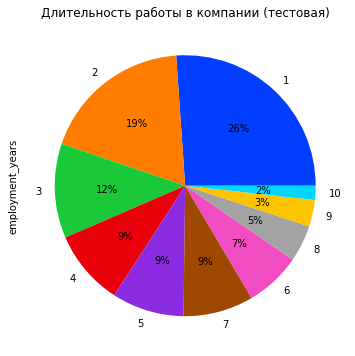

In [95]:
palette_color = sn.color_palette('bright') 
X_test_2['employment_years'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Длительность работы в компании (тестовая)', colors = palette_color, figsize = (14, 6))
plt.show()

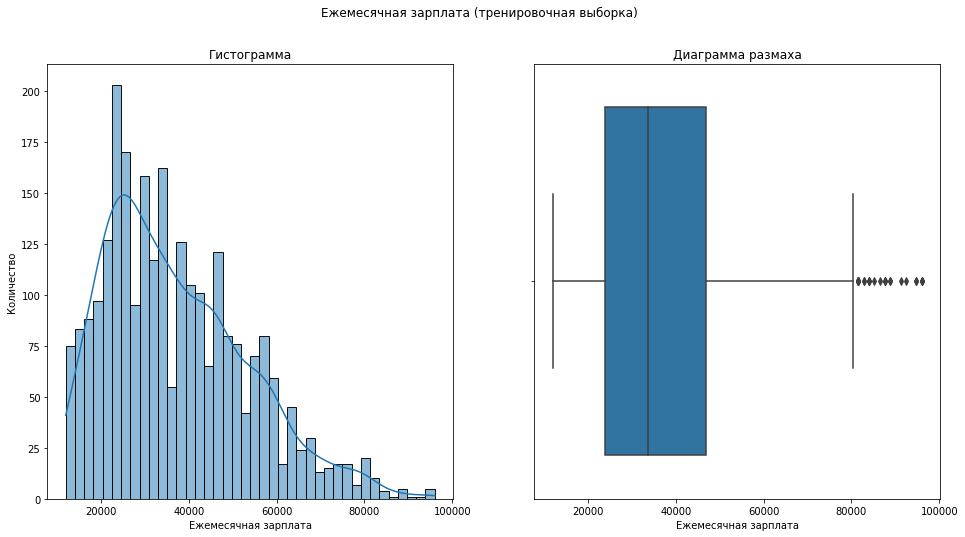

In [96]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sn.histplot(data = train_2,x = 'salary', ax=axs[0], bins = 40, kde=True)
axs[0].set_xlabel('Ежемесячная зарплата')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')
sn.boxplot(data = train_2,x = 'salary', ax=axs[1])
axs[1].set_xlabel('Ежемесячная зарплата')
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Ежемесячная зарплата (тренировочная выборка)')
plt.show()

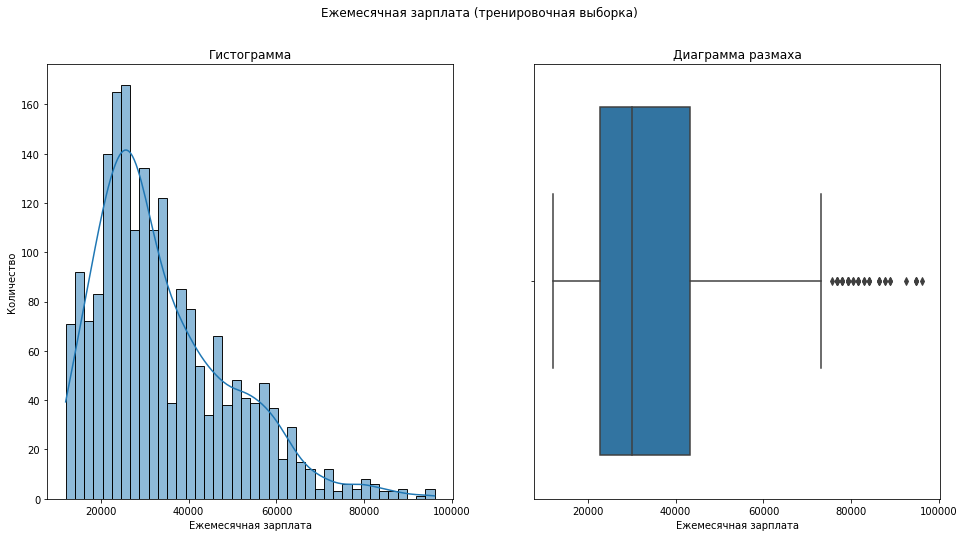

In [97]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize = (16,8))
sn.histplot(data = X_test_2,x = 'salary', ax=axs[0], bins = 40, kde=True)
axs[0].set_xlabel('Ежемесячная зарплата')
axs[0].set_ylabel('Количество')
axs[0].set_title('Гистограмма')
sn.boxplot(data = X_test_2,x = 'salary', ax=axs[1])
axs[1].set_xlabel('Ежемесячная зарплата')
axs[1].set_title('Диаграмма размаха')
fig.suptitle('Ежемесячная зарплата (тренировочная выборка)')
plt.show()

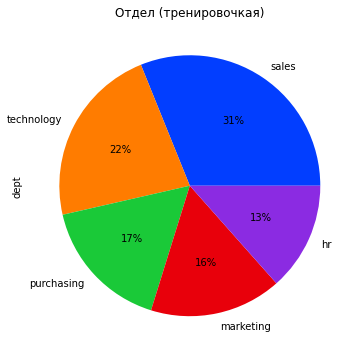

In [98]:
palette_color = sn.color_palette('bright') 
train_2['dept'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Отдел (тренировочкая)', colors = palette_color, figsize = (14, 6))
plt.show()

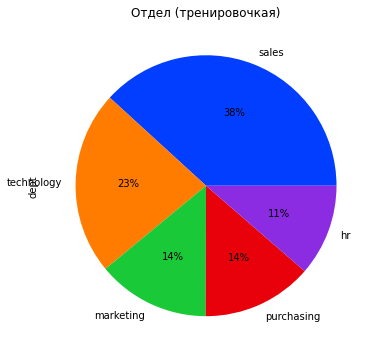

In [99]:
palette_color = sn.color_palette('bright') 
X_test_2['dept'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Отдел (тренировочкая)', colors = palette_color, figsize = (14, 6))
plt.show()

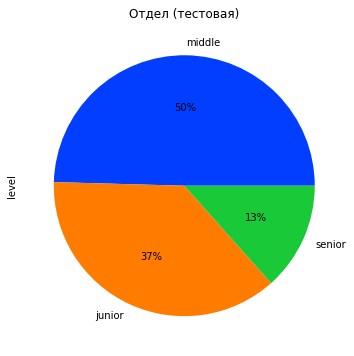

In [100]:
palette_color = sn.color_palette('bright') 
train_2['level'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Отдел (тестовая)', colors = palette_color, figsize = (14, 6))
plt.show()

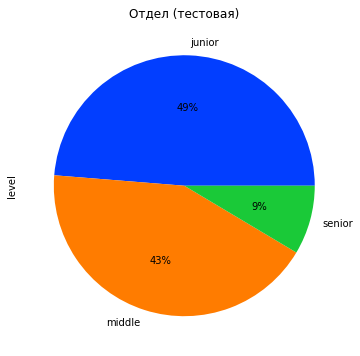

In [101]:
palette_color = sn.color_palette('bright') 
X_test_2['level'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Отдел (тестовая)', colors = palette_color, figsize = (14, 6))
plt.show()

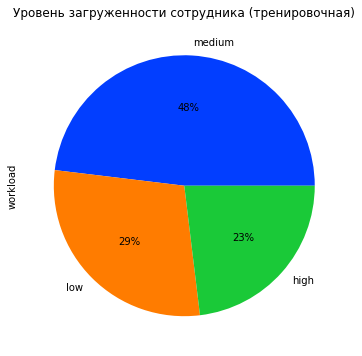

In [102]:
palette_color = sn.color_palette('bright') 
train_2['workload'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Уровень загруженности сотрудника (тренировочная)', colors = palette_color, figsize = (14, 6))
plt.show()

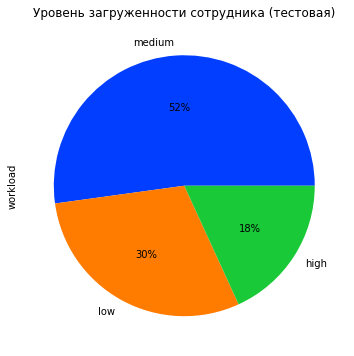

In [103]:
palette_color = sn.color_palette('bright') 
X_test_2['workload'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Уровень загруженности сотрудника (тестовая)', colors = palette_color, figsize = (14, 6))
plt.show()

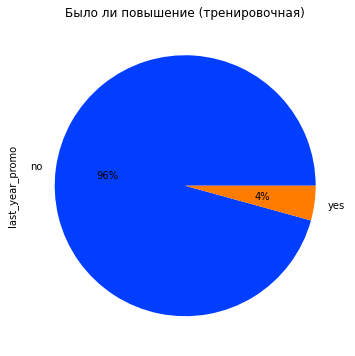

In [104]:
palette_color = sn.color_palette('bright') 
train_2['last_year_promo'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Было ли повышение (тренировочная)', colors = palette_color, figsize = (14, 6))
plt.show()

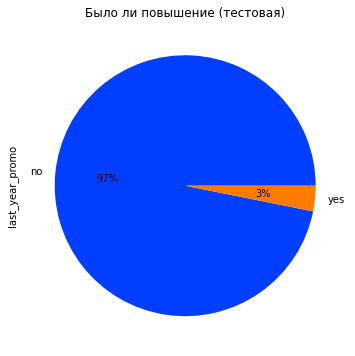

In [105]:
palette_color = sn.color_palette('bright') 
X_test_2['last_year_promo'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Было ли повышение (тестовая)', colors = palette_color, figsize = (14, 6))
plt.show()

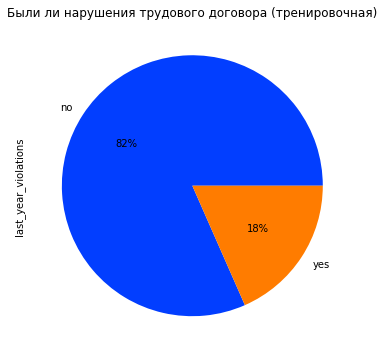

In [106]:
palette_color = sn.color_palette('bright') 
train_2['last_year_violations'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Были ли нарушения трудового договора (тренировочная)', colors = palette_color, figsize = (14, 6))
plt.show()

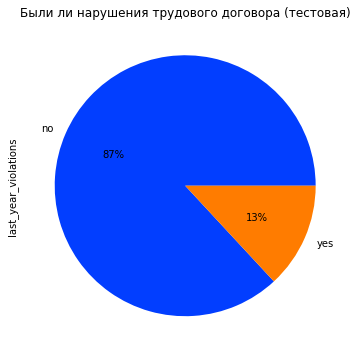

In [107]:
palette_color = sn.color_palette('bright') 
X_test_2['last_year_violations'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Были ли нарушения трудового договора (тестовая)', colors = palette_color, figsize = (14, 6))
plt.show()

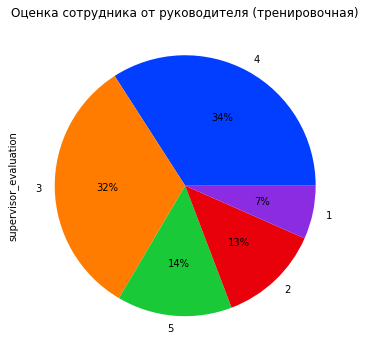

In [108]:
palette_color = sn.color_palette('bright') 
train_2['supervisor_evaluation'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Оценка сотрудника от руководителя (тренировочная)', colors = palette_color, figsize = (14, 6))
plt.show()

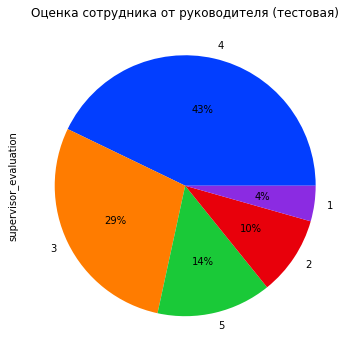

In [109]:
palette_color = sn.color_palette('bright') 
X_test_2['supervisor_evaluation'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Оценка сотрудника от руководителя (тестовая)', colors = palette_color, figsize = (14, 6))
plt.show()

In [110]:
train_2.phik_matrix(interval_cols = ['salary']).style.background_gradient(cmap ='coolwarm')

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
dept,1.000000,0.000000,0.044039,0.000000,0.000000,0.055998,0.034613,0.239042,0.000000
level,0.000000,1.000000,0.414128,0.638252,0.103413,0.042457,0.061166,0.727991,0.338524
workload,0.044039,0.414128,1.000000,0.135005,0.035267,0.000000,0.032617,0.773574,0.120695
employment_years,0.000000,0.638252,0.135005,1.000000,0.147766,0.046407,0.000000,0.428708,0.666228
last_year_promo,0.000000,0.103413,0.035267,0.147766,1.000000,0.052905,0.071082,0.187656,0.179750
last_year_violations,0.055998,0.042457,0.000000,0.046407,0.052905,1.000000,0.167330,0.120240,0.208791
supervisor_evaluation,0.034613,0.061166,0.032617,0.000000,0.071082,0.167330,1.000000,0.121599,0.187561
salary,0.239042,0.727991,0.773574,0.428708,0.187656,0.120240,0.121599,1.000000,0.557247
quit,0.000000,0.338524,0.120695,0.666228,0.179750,0.208791,0.187561,0.557247,1.000000


In [111]:
X_test_2.phik_matrix(interval_cols = ['salary']).style.background_gradient(cmap ='coolwarm')

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
dept,1.000000,0.000000,0.033894,0.000000,0.000000,0.000000,0.060917,0.330406
level,0.000000,1.000000,0.474151,0.689666,0.118258,0.017527,0.000000,0.748998
workload,0.033894,0.474151,1.000000,0.202240,0.035609,0.000000,0.036353,0.785849
employment_years,0.000000,0.689666,0.202240,1.000000,0.173637,0.066371,0.000000,0.494701
last_year_promo,0.000000,0.118258,0.035609,0.173637,1.000000,0.000000,0.011704,0.193727
last_year_violations,0.000000,0.017527,0.000000,0.066371,0.000000,1.000000,0.189719,0.000000
supervisor_evaluation,0.060917,0.000000,0.036353,0.000000,0.011704,0.189719,1.000000,0.114588
salary,0.330406,0.748998,0.785849,0.494701,0.193727,0.000000,0.114588,1.000000


По результатам данного шага можно сказать, что выбросов и аномалий в данных не обнаружено. Между некоторыми признаками есть связь, но она нигде не превышает 0.9, так что менять ничего не будем. Так же было проведено сравнение тестовой и тренировочной выборки - сильных отличий нет\
\
Для подготовки признаков будем использовать:
- MinMaxScaler/StandartScaler для стобцов `employment_years`, `salary`
- OrdinalEncoder для столбцов `supervisor_evaluation`, `level`, `workload`
- OneHotEncoder для столбцов `dept`, `last_year_promo`, `last_year_violations`

#### Портрет «уволившегося сотрудника»

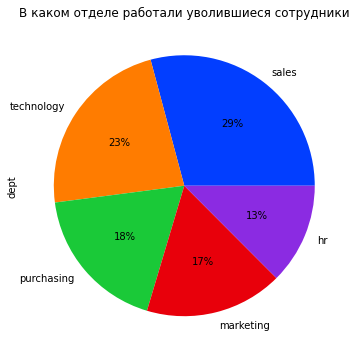

In [112]:
palette_color = sn.color_palette('bright') 
train_2.loc[train_2['quit'] == 'yes', 'dept'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'В каком отделе работали уволившиеся сотрудники', colors = palette_color, figsize = (14, 6))
plt.show()

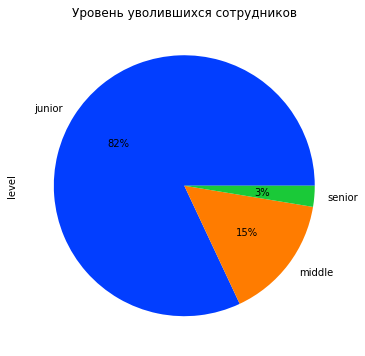

In [113]:
palette_color = sn.color_palette('bright') 
train_2.loc[train_2['quit'] == 'yes', 'level'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Уровень уволившихся сотрудников', colors = palette_color, figsize = (14, 6))
plt.show()

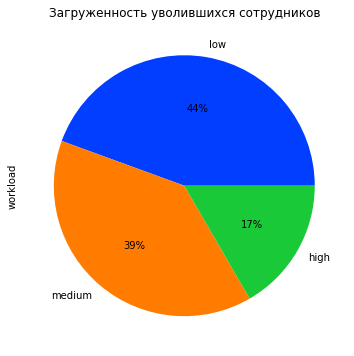

In [114]:
palette_color = sn.color_palette('bright') 
train_2.loc[train_2['quit'] == 'yes', 'workload'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Загруженность уволившихся сотрудников', colors = palette_color, figsize = (14, 6))
plt.show()

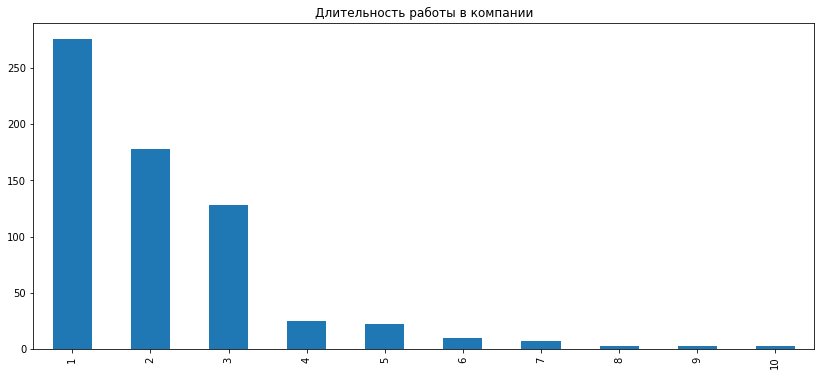

In [115]:
palette_color = sn.color_palette('bright') 
train_2.loc[train_2['quit'] == 'yes', 'employment_years'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Длительность работы в компании (в годах)', colors = palette_color, figsize = (14, 6))
plt.show()

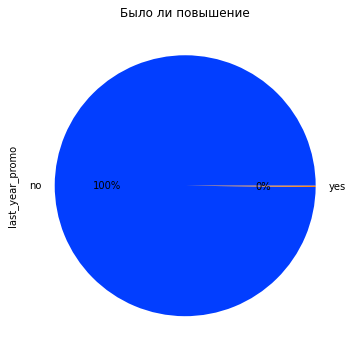

In [116]:
palette_color = sn.color_palette('bright') 
train_2.loc[train_2['quit'] == 'yes', 'last_year_promo'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Было ли повышение', colors = palette_color, figsize = (14, 6))
plt.show()

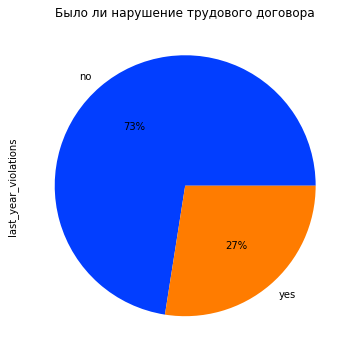

In [117]:
palette_color = sn.color_palette('bright') 
train_2.loc[train_2['quit'] == 'yes', 'last_year_violations'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Было ли нарушение трудового договора', colors = palette_color, figsize = (14, 6))
plt.show()

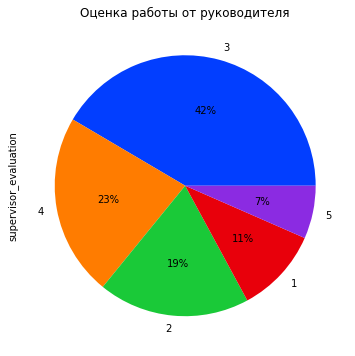

In [118]:
palette_color = sn.color_palette('bright') 
train_2.loc[train_2['quit'] == 'yes', 'supervisor_evaluation'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'Оценка работы от руководителя', colors = palette_color, figsize = (14, 6))
plt.show()

In [119]:
no = train_2.loc[train_2['quit'] == 'no', 'salary'].mean()
yes = train_2.loc[train_2['quit'] == 'yes', 'salary'].mean()
(no/yes - 1)*100

58.92685100748596

**Портрет «уволившегося сотрудника:**
- Распределение по отделам +- равномерное, больше всего уволилось сотрудников из отделов `sales`, `technology`
- 80% из них - уровень `junior`
- Загрузка в большинстве случаев `low`/`medium`
- Работает в компании как правило меньше 3х лет (большинство и вовсе 1 год)
- Повышения за последний год не было почти у 100% 
- Трудовой договор в основном не нарушают
- Большинство имеют оценку 3 от руководителя, вторая по популярности - 4
- Средняя зааботная плата неуволившегося сотрудника на 58% больше уволившегося

#### Визуализируйте и сравните распределения признака job_satisfaction_rate для ушедших и оставшихся сотрудников

In [120]:
y_test_2 = y_test_2.sort_index()
X_test_2 = X_test_2.sort_index()

In [121]:
new_test = X_test_2
new_test['job_satisfaction_rate'] = y_test['job_satisfaction_rate']
new_test['quit'] = y_test_2['quit']

In [122]:
new_test.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
id,,,,,,,,,,
100298,hr,junior,low,2,no,no,4,19200,0.80,no
100480,marketing,junior,low,4,no,no,4,16800,0.84,no
100503,purchasing,middle,high,5,no,no,4,55200,0.79,no
100610,sales,middle,medium,5,no,no,4,43200,0.75,no
100692,sales,middle,high,6,no,no,4,48000,0.69,no


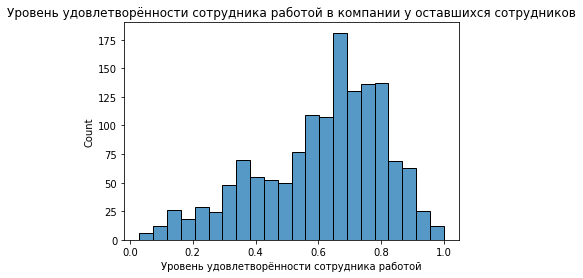

In [123]:
sn.histplot(data = new_test.loc[new_test['quit']=='no'], x='job_satisfaction_rate')
plt.xlabel('Уровень удовлетворённости сотрудника работой')
plt.title('Уровень удовлетворённости сотрудника работой в компании у оставшихся сотрудников')
plt.show()

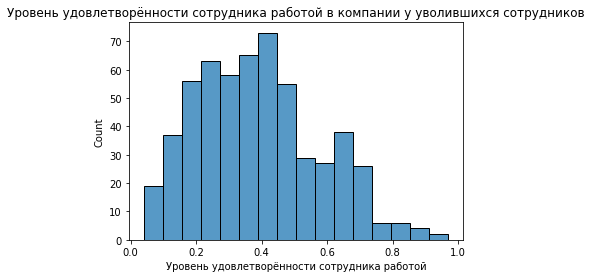

In [124]:
sn.histplot(data = new_test.loc[new_test['quit']=='yes'], x='job_satisfaction_rate')
plt.xlabel('Уровень удовлетворённости сотрудника работой')
plt.title('Уровень удовлетворённости сотрудника работой в компании у уволившихся сотрудников')
plt.show()

Анализируя данные графики можно сказать, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник, ведь если у уволившихся сотрудниках в большинстве случаев он меньше 0.5, то у оставшихся - больше 0.6

### Добавление нового входного признака

In [125]:
train_2['job_satisfaction_rate'] = grid_search.predict(train_2.drop(['quit'], axis = 1))
X_test_2['job_satisfaction_rate'] = grid_search.predict(X_test_2)

В данном этапе был добавлен новый столбец к датафреймам

In [126]:
X_test_2.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
id,,,,,,,,,,
100298,hr,junior,low,2,no,no,4,19200,0.820000,no
100480,marketing,junior,low,4,no,no,4,16800,0.852000,no
100503,purchasing,middle,high,5,no,no,4,55200,0.746667,no
100610,sales,middle,medium,5,no,no,4,43200,0.814000,no
100692,sales,middle,high,6,no,no,4,48000,0.712500,no


### Подготовка данных

In [127]:
ohe_columns = ['dept', 'last_year_promo',  'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['supervisor_evaluation', 'employment_years', 'salary', 'job_satisfaction_rate']
RANDOM_STATE = 50

y = train_2['quit']
X = train_2.drop(['quit'], axis = 1)

Остальное изменять не надо, пайплайны для подготовки данных уже были написаны при решении предыдущей задачи.

### Обучение модели


In [128]:
pipe_final= Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LogisticRegression(random_state=RANDOM_STATE))
])

In [129]:
param_distributions = [
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()]   
    },
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 11),
        'models__max_features': range(2, 11),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    {
        'models': [SVC(random_state=RANDOM_STATE, probability= True)],
        'models__C': range(1, 10),
        'models__kernel': ['rbf', 'linear', 'sigmoid'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  

    },
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'models__C': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    }
] 

In [130]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions, 
    scoring='roc_auc', 
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X, y)

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pipeline...
                                                        random_state=50)],
                                         'models__C': range(1, 10),
                                         'models__kernel': ['rbf', 'linear',
                                                            'sigmoid'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               RobustScaler(),
                                                               'passthrough']},
                                        {'models': [LogisticRegression(random_state=50)],
                                         'models__C': range(1, 10),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               RobustScaler(),
                                                               'passthrough']}],
                   random_state=50, scoring='roc_auc')

In [131]:
randomized_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_befor...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(categories=[['junior',
                                                                                               'middle',
                                                                                               'senior'],
                                                                                              ['low',
                                                                                               'medium',
                                                                                               'high']])),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['level', 'workload']),
                                                 ('num', MinMaxScaler(),
                                                  ['supervisor_evaluation',
                                                   'employment_years',
                                                   'salary'])])),
                ('models',
                 DecisionTreeClassifier(max_depth=5, max_features=10,
                                        random_state=50))])

Лучшей моделью оказалось `DecisionTreeClassifier(max_depth=5, max_features=10, random_state=50)` 

In [132]:
randomized_search.best_score_

0.9028493065731066

In [133]:
y_predict_proba = randomized_search.predict_proba(X_test_2)

In [134]:
roc_auc_score(y_test_2, y_predict_proba[:, 1])

0.9152084691518994

Значение метрики больше чем 0.91, значит всё прошло успешно

### Промежуточные выводы


В данном шаге была найдена и обучена лучшая модель по предсказанию увольнения сотрудника. Значение метрики на тестовой выборке составляет 0.915, что является успехом, ведь для неё необходимо значение >=0.91. Лучшей моделью стала `DecisionTreeClassifier(max_depth=5, max_features=10, random_state=50)`. Данная модель справилась лучше остальных, так как лучше справляется при нелинейной зависимости признаков, а, учитывая матрицу корреляции, можно сказать, что у нас признаков с такой зависимостью много.

## Итоговый вывод

Перед нами стояло несколько задач. Первая — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 
Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.\
А наша вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.\
При решении обеих задач были пройдены следующие этапы:
- Загрузка и первичное изучение данных
- Предобработка данных: данные были проверены на пропуски и дубликаты
- Исследовательский анализ данных: построение графиков, матриц корелляции
- Подготовка данных: написание пайплайнов для подготовки данных (кодирование, масштабирование)
- Обучение модели: был написан пайплайн, который перебирал модели, способы масштабирования и гиперпараметры

Рекомендации бизнессу по снижению уровня увольнений:

- Больше всего уволилось сотрудников из отделов sales, technology - следует провести доп. опросы данных отделов
- 80% из уволившихся - уровень junior, работают от 1 до 3х лет - следует больше времени уделять новичкам
- Почти у 100% уволившихся не было повышения за последний год - стоит подумать о карьерном росте сотрудников
- Средняя зааботная плата неуволившегося сотрудника на 58% больше уволившегося - возможно необходимо увеличить зарплату
- Есть зависимость между увольнением и удовлетворённостью сотрудника, используя написанную мною модель, можно предсказывать удовлетворённость сотрудников, и при необходимости проводить дополнительные меры/опросы с целью её увеличения